In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
image_data = pd.read_csv('./csv/activity_by_day_added_targets.csv', delimiter=';')

# # Convert the 'time' column to datetime format
image_data['time'] = pd.to_datetime(df['time'])

image_data

,time,mean_gray,count_pixels_lighter,week_of_year,slope,movement,worms,feeding_day,highlight,cutout,food
0,2024-06-29,24.884902,826212,26,-0.297420,1,0,0,0,0,Melon
1,2024-06-30,30.382977,4093642,26,5.498075,1,0,1,0,0,Melon
2,2024-07-01,43.052295,3651325,27,12.669318,1,0,0,0,0,Melon
3,2024-07-02,41.182413,7418499,27,-1.869882,1,1,0,0,0,Melon
4,2024-07-03,39.924396,11842906,27,-1.258017,1,1,1,0,1,Oats
...,...,...,...,...,...,...,...,...,...,...,...
112,2024-10-28,45.008231,93791939,44,-6.675343,0,0,1,0,1,Oats
113,2024-10-29,41.372159,138661651,44,-3.636072,0,0,0,0,1,Oats
114,2024-10-30,38.872445,136393567,44,-2.499714,0,0,0,0,1,Oats
115,2024-10-31,34.391360,135642726,44,-4.481085,0,0,0,0,1,Oats


In [147]:
image_data.describe()

,time,mean_gray,count_pixels_lighter,week_of_year,slope,movement,worms,feeding_day,highlight,cutout
count,117,117.000000,1.170000e+02,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,2024-08-26 12:55:23.076923136,31.596328,5.943165e+07,34.649573,0.094752,0.581197,0.418803,0.162393,0.273504,0.205128
min,2024-06-29 00:00:00,11.423346,8.262120e+05,26.000000,-24.009543,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-07-28 00:00:00,20.540703,3.339986e+07,30.000000,-2.571609,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-08-26 00:00:00,30.382977,5.882564e+07,35.000000,-1.460094,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2024-09-24 00:00:00,40.701598,8.312243e+07,39.000000,-0.069226,1.000000,1.000000,0.000000,1.000000,0.000000
max,2024-11-01 00:00:00,64.711140,1.386617e+08,44.000000,39.066490,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,13.752067,3.559336e+07,4.993645,7.468451,0.495485,0.495485,0.370397,0.447675,0.405532


In [148]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  117 non-null    datetime64[ns]
 1   mean_gray             117 non-null    float64       
 2   count_pixels_lighter  117 non-null    int64         
 3   week_of_year          117 non-null    int64         
 4   slope                 117 non-null    float64       
 5   movement              117 non-null    int64         
 6   worms                 117 non-null    int64         
 7   feeding_day           117 non-null    int64         
 8   highlight             117 non-null    int64         
 9   cutout                117 non-null    int64         
 10  food                  102 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 10.2+ KB


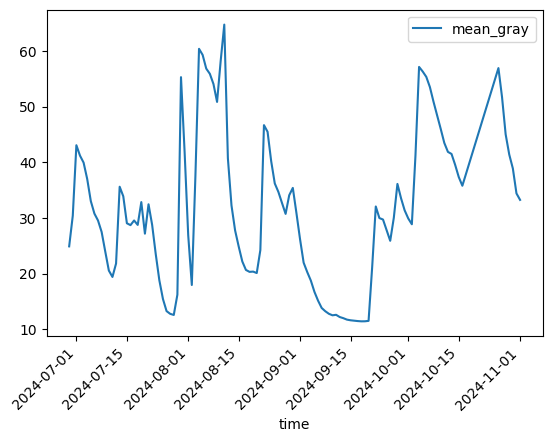

In [149]:
image_data.plot(x='time', y=['mean_gray'], kind='line')
plt.xticks(rotation=45)
plt.show()

## Clean

In [150]:
image_data_filtered = image_data[(image_data['feeding_day'] != 1) & (image_data['cutout'] != 1)]

image_data_filtered

,time,mean_gray,count_pixels_lighter,week_of_year,slope,movement,worms,feeding_day,highlight,cutout,food
0,2024-06-29,24.884902,826212,26,-0.297420,1,0,0,0,0,Melon
2,2024-07-01,43.052295,3651325,27,12.669318,1,0,0,0,0,Melon
3,2024-07-02,41.182413,7418499,27,-1.869882,1,1,0,0,0,Melon
14,2024-07-13,35.596787,11603093,28,13.791460,1,1,0,1,0,Beans
16,2024-07-15,29.035055,86875118,29,-4.845654,1,1,0,1,0,Beans
...,...,...,...,...,...,...,...,...,...,...,...
104,2024-10-11,43.454847,97176667,41,-2.529779,0,1,0,0,0,Melon
105,2024-10-12,41.853344,98307939,41,-1.601503,0,1,0,0,0,Melon
106,2024-10-13,41.480847,107386272,41,-0.372497,0,1,0,0,0,Melon
107,2024-10-14,39.530680,108608661,42,-1.950167,0,1,0,0,0,Melon


<Axes: >

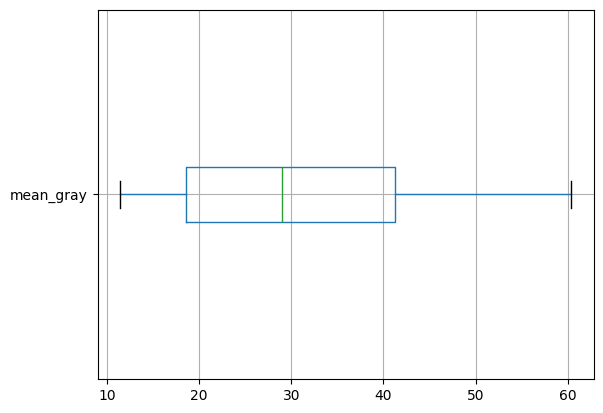

In [151]:
image_data_filtered.boxplot(column='mean_gray', vert=False)

## Check amount of worms detected for each day

In [152]:
# Load the CSV file into a DataFrame
detections = pd.read_csv('./data/csv/image-predictions.csv', usecols=['time', 'class', 'confidence', 'x', 'y', 'width', 'height'])

# Convert the 'time' column to datetime format
detections['time'] = pd.to_datetime(detections['time'])

detections

,time,x,y,width,height,class,confidence
0,2024-08-18 22:58:11.784157,486,428,57,27,worm,0.186
1,2024-08-19 08:49:07.848705,514,430,123,30,worm,0.357
2,2024-08-19 08:49:07.848705,957,252,75,118,worm,0.320
3,2024-08-19 09:01:47.573271,959,249,75,121,worm,0.779
4,2024-08-19 09:01:47.573271,503,429,102,28,worm,0.378
...,...,...,...,...,...,...,...
141629,2024-11-08 13:38:35.302109,82,83,131,160,worm,0.159
141630,2024-11-08 13:41:35.270319,78,83,134,160,worm,0.180
141631,2024-11-08 14:16:35.237698,966,446,115,74,worm,0.209
141632,2024-11-08 14:25:35.302170,93,84,140,165,worm,0.116


In [153]:
from shapely.geometry import box

# Function to check if two bounding boxes overlap
def is_overlap(row1, row2):
    box1 = box(row1['x'], row1['y'], row1['x'] + row1['width'], row1['y'] + row1['height'])
    box2 = box(row2['x'], row2['y'], row2['x'] + row2['width'], row2['y'] + row2['height'])
    return box1.intersects(box2)

# Sort detections by time
detections_sorted = detections.sort_values(by='time')

# Initialize a list to keep track of rows to keep
rows_to_keep = []

# Iterate through the sorted detections
for i, row in detections_sorted.iterrows():
    if i == 0:
        rows_to_keep.append(i)
    else:
        previous_row = detections_sorted.iloc[i - 1]
        if not is_overlap(row, previous_row):
            rows_to_keep.append(i)

# Filter the DataFrame to keep only non-overlapping rows
detections_non_overlapping = detections_sorted.loc[rows_to_keep]

detections_non_overlapping

,time,x,y,width,height,class,confidence
0,2024-08-18 22:58:11.784157,486,428,57,27,worm,0.186
2,2024-08-19 08:49:07.848705,957,252,75,118,worm,0.320
4,2024-08-19 09:01:47.573271,503,429,102,28,worm,0.378
5,2024-08-19 09:02:25.545031,958,252,73,118,worm,0.472
6,2024-08-19 09:02:25.545031,506,430,110,31,worm,0.280
...,...,...,...,...,...,...,...
141593,2024-11-08 11:25:35.237122,141,703,126,122,worm,0.560
141594,2024-11-08 11:25:35.237122,158,270,388,84,worm,0.223
141595,2024-11-08 12:37:35.270221,77,78,134,152,worm,0.106
141631,2024-11-08 14:16:35.237698,966,446,115,74,worm,0.209


In [154]:
detections_worm = detections_non_overlapping[detections_non_overlapping['class'] == 'worm']
detections_worm

,time,x,y,width,height,class,confidence
0,2024-08-18 22:58:11.784157,486,428,57,27,worm,0.186
2,2024-08-19 08:49:07.848705,957,252,75,118,worm,0.320
4,2024-08-19 09:01:47.573271,503,429,102,28,worm,0.378
5,2024-08-19 09:02:25.545031,958,252,73,118,worm,0.472
6,2024-08-19 09:02:25.545031,506,430,110,31,worm,0.280
...,...,...,...,...,...,...,...
141593,2024-11-08 11:25:35.237122,141,703,126,122,worm,0.560
141594,2024-11-08 11:25:35.237122,158,270,388,84,worm,0.223
141595,2024-11-08 12:37:35.270221,77,78,134,152,worm,0.106
141631,2024-11-08 14:16:35.237698,966,446,115,74,worm,0.209


In [173]:
detections_worm_by_day_confident = detections_worm[detections_worm['confidence'] > 0.8]

detections_worm_by_day = detections_worm_by_day_confident.groupby(pd.Grouper(key='time', freq='10min')).agg({
    'confidence': 'mean',
    'class': 'count'
}).rename(columns={'class': 'detections_count'})

detections_worm_by_day.reset_index(inplace=True)

detections_worm_by_day

,time,confidence,detections_count
0,2024-08-19 09:40:00,0.8110,1
1,2024-08-19 09:50:00,NaN,0
2,2024-08-19 10:00:00,0.8250,1
3,2024-08-19 10:10:00,0.8445,2
4,2024-08-19 10:20:00,NaN,0
...,...,...,...
10967,2024-11-03 13:30:00,NaN,0
10968,2024-11-03 13:40:00,NaN,0
10969,2024-11-03 13:50:00,NaN,0
10970,2024-11-03 14:00:00,NaN,0


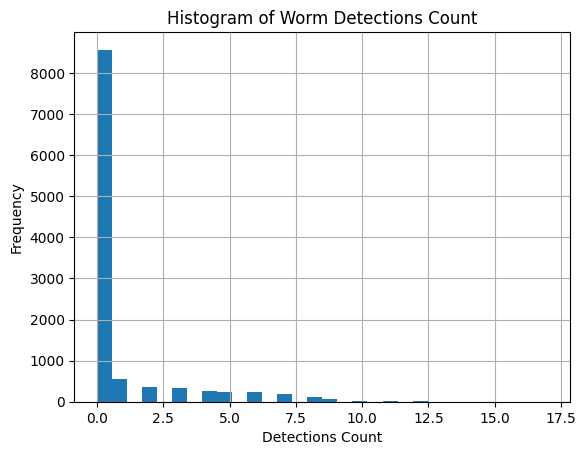

In [174]:
detections_worm_by_day['detections_count'].hist(bins=30)
plt.xlabel('Detections Count')
plt.ylabel('Frequency')
plt.title('Histogram of Worm Detections Count')
plt.show()


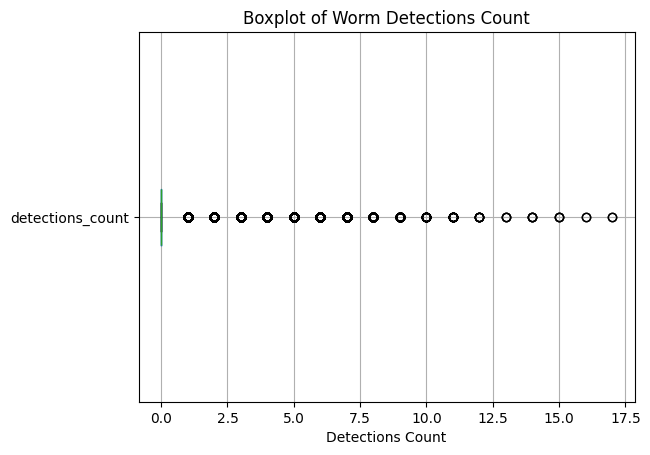

In [175]:
detections_worm_by_day.boxplot(column='detections_count', vert=False)
plt.xlabel('Detections Count')
plt.title('Boxplot of Worm Detections Count')
plt.show()

In [176]:
detections_worm_by_day_filtered = detections_worm_by_day[detections_worm_by_day['detections_count'] <= 30]
detections_worm_by_day_filtered

,time,confidence,detections_count
0,2024-08-19 09:40:00,0.8110,1
1,2024-08-19 09:50:00,NaN,0
2,2024-08-19 10:00:00,0.8250,1
3,2024-08-19 10:10:00,0.8445,2
4,2024-08-19 10:20:00,NaN,0
...,...,...,...
10967,2024-11-03 13:30:00,NaN,0
10968,2024-11-03 13:40:00,NaN,0
10969,2024-11-03 13:50:00,NaN,0
10970,2024-11-03 14:00:00,NaN,0


In [177]:
# Resample image_data to 10-minute intervals
image_data_resampled = image_data.set_index('time').resample('10min').ffill().reset_index()

# Merge detections_worm_by_day_filtered with resampled image_data on the 'time' column
detections_worm_by_day_with_highlight = detections_worm_by_day_filtered.merge(image_data_resampled[['time', 'highlight']], on='time', how='left')

detections_worm_by_day_with_highlight.dropna(subset=['highlight'], inplace=True)
detections_worm_by_day_with_highlight

,time,confidence,detections_count,highlight
0,2024-08-19 09:40:00,0.8110,1,0.0
1,2024-08-19 09:50:00,NaN,0,0.0
2,2024-08-19 10:00:00,0.8250,1,0.0
3,2024-08-19 10:10:00,0.8445,2,0.0
4,2024-08-19 10:20:00,NaN,0,0.0
...,...,...,...,...
10594,2024-10-31 23:20:00,NaN,0,0.0
10595,2024-10-31 23:30:00,NaN,0,0.0
10596,2024-10-31 23:40:00,NaN,0,0.0
10597,2024-10-31 23:50:00,NaN,0,0.0


In [160]:
# Merge the detections_worm_by_day DataFrame with df_by_day on the 'time' index
merged_df = image_data_filtered.merge(detections_worm_by_day, left_index=True, right_index=True)
merged_df.sort_values(by='detections_count', ascending=False)
merged_df.dropna(inplace=True)
merged_df

,time_x,mean_gray,count_pixels_lighter,week_of_year,slope,movement,worms,feeding_day,highlight,cutout,food,time_y,confidence,detections_count
0,2024-06-29,24.884902,826212,26,-0.297420,1,0,0,0,0,Melon,2024-08-18 22:50:00,0.186000,1
59,2024-08-27,32.678899,121792840,35,-1.984505,1,0,0,0,0,Oats,2024-08-19 08:40:00,0.320000,1
62,2024-08-30,35.383623,62246215,35,1.321870,1,1,0,1,0,Banana,2024-08-19 09:10:00,0.323192,26
63,2024-08-31,30.877277,72772158,35,-4.506346,1,1,0,1,0,Banana,2024-08-19 09:20:00,0.412471,17
64,2024-09-01,26.189656,68137866,35,-4.687620,1,1,0,1,0,Banana,2024-08-19 09:30:00,0.401857,21
65,2024-09-02,21.955984,58109770,36,-4.233672,1,1,0,1,0,Banana,2024-08-19 09:40:00,0.500526,19
66,2024-09-03,20.268495,52207477,36,-1.687489,1,1,0,1,0,Banana,2024-08-19 09:50:00,0.497071,14
67,2024-09-04,18.737064,54064671,36,-1.531432,1,1,0,0,0,Banana,2024-08-19 10:00:00,0.582750,16
68,2024-09-05,16.707700,45181624,36,-2.029364,1,1,0,0,0,Banana,2024-08-19 10:10:00,0.619882,17
85,2024-09-22,32.052618,58723361,38,10.876039,0,0,0,0,0,Banana,2024-08-19 13:00:00,0.443190,21


## Check correlation between highlight and detections_count

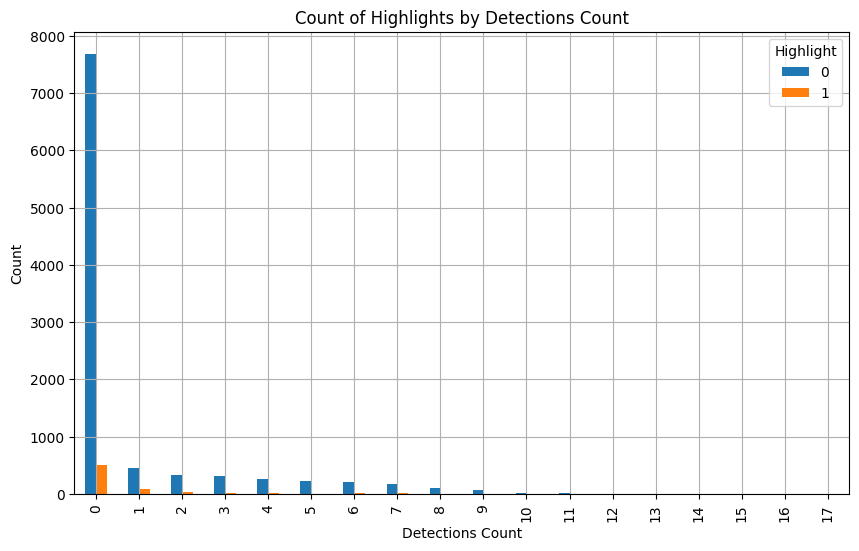

In [183]:
# Group by 'detections_count' and 'highlight' and count the occurrences
highlight_counts = detections_worm_by_day_with_highlight.groupby(['detections_count', 'highlight']).size().unstack(fill_value=0)

# Plot the bar chart
highlight_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Detections Count')
plt.ylabel('Count')
plt.title('Count of Highlights by Detections Count')
plt.legend(title='Highlight', labels=['0', '1'])
plt.grid(True)
plt.show()


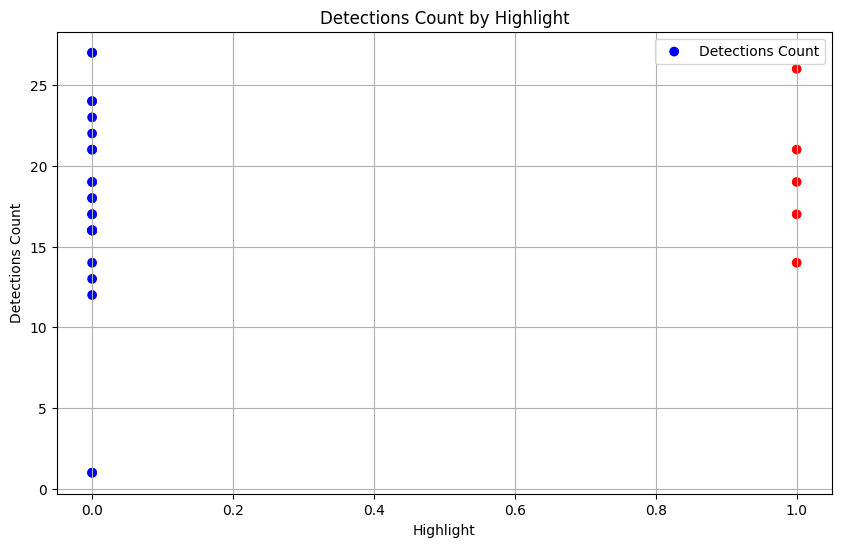

Correlation between worms and detections_count: 0.1276416811223834


In [178]:
highlight_colors = merged_df['highlight'].map({0: 'blue', 1: 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['highlight'], merged_df['detections_count'], c=highlight_colors, label='Detections Count')
plt.xlabel('Highlight')
plt.ylabel('Detections Count')
plt.title('Detections Count by Highlight')
plt.grid(True)
plt.legend()
plt.show()

# Calculate and display the correlation number
correlation = merged_df['highlight'].corr(merged_df['detections_count'])
print(f"Correlation between worms and detections_count: {correlation}")

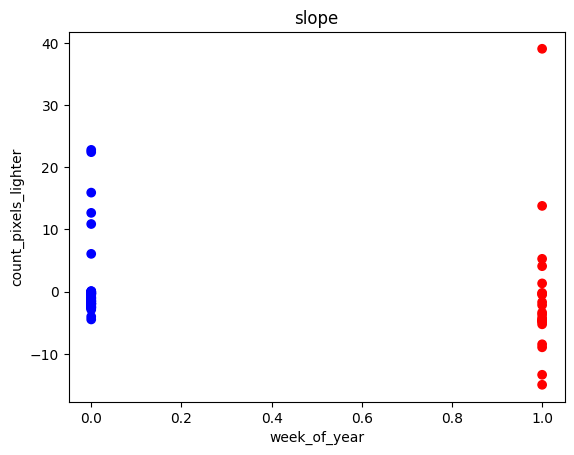

Correlation between slope and count_pixels_lighter: -0.14696536721692652


In [162]:
# Plot the correlation between 'slope' and 'count_pixels_lighter'
highlight_colors = image_data_filtered['highlight'].map({0: 'blue', 1: 'red'})

plt.scatter(image_data_filtered['highlight'], image_data_filtered['slope'], c=highlight_colors)
plt.xlabel('week_of_year')
plt.ylabel('count_pixels_lighter')
plt.title('slope')
plt.show()

# Calculate and display the correlation number
correlation = image_data_filtered['slope'].corr(image_data_filtered['count_pixels_lighter'])
print(f"Correlation between slope and count_pixels_lighter: {correlation}")